In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
gp=pd.read_csv("C:/Users/harik/Downloads/googleplaystore.csv")

In [26]:
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

In [27]:
##Finding the missing values

In [28]:
category_mean=gp.groupby('Category')['Rating'].transform('mean')

In [29]:
category_mean

0        4.358065
1        4.358065
2        4.358065
3        4.358065
4        4.358065
           ...   
10836    4.192272
10837    4.192272
10838    4.189143
10839    4.346067
10840    4.094904
Name: Rating, Length: 10841, dtype: float64

In [30]:
gp['Rating']=gp['Rating'].fillna(category_mean)
gp['Type']=gp['Type'].fillna(value='Free')
gp['Content Rating']=gp['Content Rating'].fillna(value='Everyone')
gp['Current Ver']=gp['Current Ver'].fillna(value='Version not mentioned')
gp['Android Ver']=gp['Android Ver'].fillna(value='Andriod ver not mentioned')

In [31]:
gp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [32]:
##finding duplicates

In [33]:
gp.duplicated().sum()

483

In [34]:
gp.drop_duplicates(keep='first',inplace=True)

In [35]:
gp.shape

(10358, 13)

In [36]:
#Number of Contents in Different Categories

<Axes: >

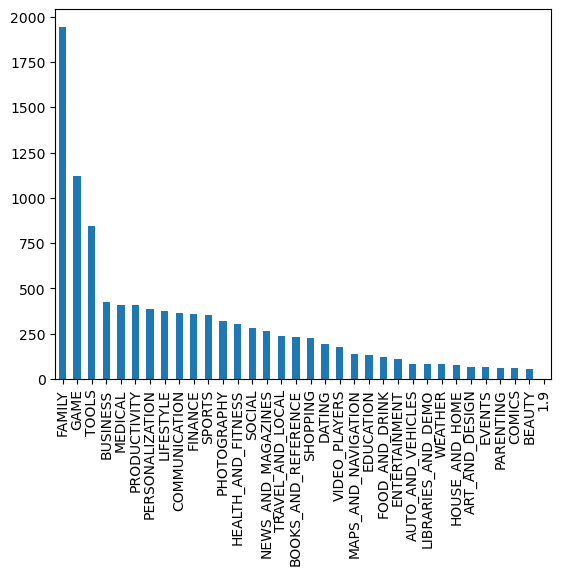

In [37]:
gp["Category"].value_counts().plot(kind="bar")

In [38]:
#Range of Rating min,max,quantile ranges

<Axes: xlabel='Rating'>

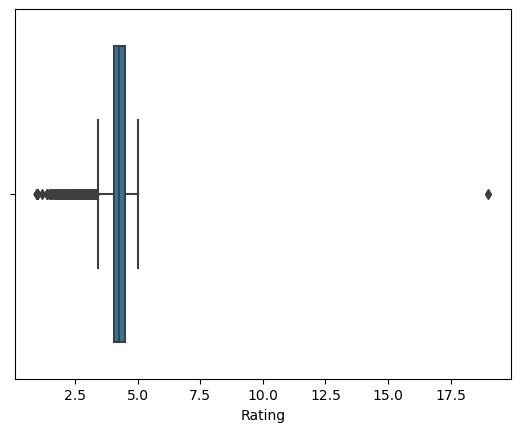

In [39]:
sns.boxplot(data=gp,x="Rating")

In [40]:
#Number of installs

[Text(0, 0, '10,000+'),
 Text(1, 0, '500,000+'),
 Text(2, 0, '5,000,000+'),
 Text(3, 0, '50,000,000+'),
 Text(4, 0, '100,000+'),
 Text(5, 0, '50,000+'),
 Text(6, 0, '1,000,000+'),
 Text(7, 0, '10,000,000+'),
 Text(8, 0, '5,000+'),
 Text(9, 0, '100,000,000+'),
 Text(10, 0, '1,000,000,000+'),
 Text(11, 0, '1,000+'),
 Text(12, 0, '500,000,000+'),
 Text(13, 0, '50+'),
 Text(14, 0, '100+'),
 Text(15, 0, '500+'),
 Text(16, 0, '10+'),
 Text(17, 0, '1+'),
 Text(18, 0, '5+'),
 Text(19, 0, '0+'),
 Text(20, 0, '0'),
 Text(21, 0, 'Free')]

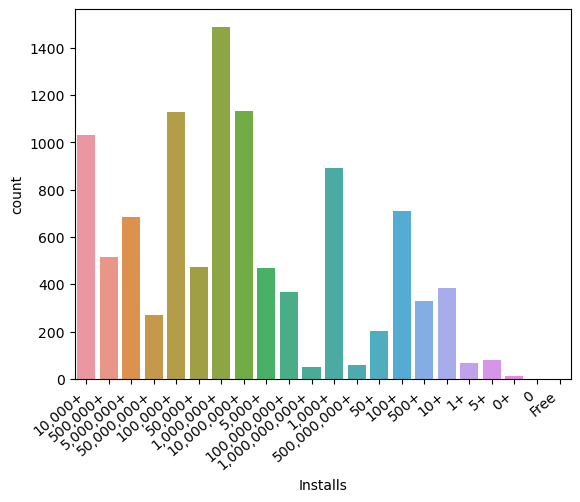

In [41]:
ax=sns.countplot(data=gp,x="Installs")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [56]:
sorted_reviews=gp.sort_values(by="Reviews",ascending=False)
sorted_reviews.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,sorted_reviews
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,9992
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,999
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,9975
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,9971
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,9971
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up,997
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5.5M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up,9966
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10M,"50,000+",Free,0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up,996
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,Varies with device,"10,000,000+",Free,0,Everyone,Communication,"July 30, 2018",Varies with device,Varies with device,99559
326,Buff Thun - Daily Free Webtoon / Comics / Web ...,COMICS,4.5,9952,38M,"500,000+",Free,0,Everyone 10+,Comics,"July 31, 2018",4.3.0,4.1 and up,9952


In [47]:
#Displaying Apps having the ratings as 5
c=0
for i in gp['Rating']:
    if i==5:
        c+=1
print("There are",c,"number of apps having rating as 5")

271


In [49]:
#Total number of apps which has the rating between 4 and 4.5
c=0
for i in gp['Rating']:
    if i>=4 or i<=4.5:
        c+=1
print("There are total of",c,"number of apps with rating in between 4 and 4.5")

There are total of 10358 number of apps with rating in between 4 and 4.5


In [51]:
#Categorical average rating 
gp.groupby('Category')['Rating'].mean()


Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.347137
BUSINESS                4.109527
COMICS                  4.155172
COMMUNICATION           4.152606
DATING                  3.971523
EDUCATION               4.376069
ENTERTAINMENT           4.136036
EVENTS                  4.435556
FAMILY                  4.191282
FINANCE                 4.127976
FOOD_AND_DRINK          4.164561
GAME                    4.281496
HEALTH_AND_FITNESS      4.263701
HOUSE_AND_HOME          4.169605
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.095854
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.184189
NEWS_AND_MAGAZINES      4.129202
PARENTING               4.300000
PERSONALIZATION         4.334296
PHOTOGRAPHY             4.183410
PRODUCTIVITY            4.203518
SHOPPING                4.252288
SOCIAL                  4.255006
SPORTS                  4.224867
T

In [57]:
#Total number of paid and free apps
c=0
d=0
for i in gp['Type']:
    if i=='Free':
        c=c+1
    else:
        d=d+1
print("There are a total of",c,"number of free apps and",d,"number of paid apps")

There are a total of 9592 number of free apps and 766 number of paid apps


In [60]:
#total number of apps in each category 
gp.groupby('Category')['App'].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     230
BUSINESS                427
COMICS                   60
COMMUNICATION           366
DATING                  196
EDUCATION               130
ENTERTAINMENT           111
EVENTS                   64
FAMILY                 1943
FINANCE                 360
FOOD_AND_DRINK          124
GAME                   1121
HEALTH_AND_FITNESS      306
HOUSE_AND_HOME           80
LIBRARIES_AND_DEMO       85
LIFESTYLE               373
MAPS_AND_NAVIGATION     137
MEDICAL                 408
NEWS_AND_MAGAZINES      264
PARENTING                60
PERSONALIZATION         388
PHOTOGRAPHY             322
PRODUCTIVITY            407
SHOPPING                224
SOCIAL                  280
SPORTS                  351
TOOLS                   843
TRAVEL_AND_LOCAL        237
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

In [74]:
#Total number of free apps in the category of Art and design
gp_pr=gp[gp['Category']=='ART_AND_DESIGN']
gp_pr[gp_pr['Type']=='Free']
len(gp_pr)

65

In [83]:
#total number of apps within Art and design category with the rating greater than 4.5
gp_pr=gp[gp['Category']=='ART_AND_DESIGN']
len(gp_pr[gp_pr['Rating']>4])

55

In [88]:
#listing the free apps with the rating more than 4.5 and free
gp_pr=gp[gp['Category']=='FAMILY']
gp_pr=gp_pr[gp_pr['Rating']>4.5]
9gp_pr[gp_pr["Type"]=='Free']['App']

2020     Super ABC! Learning games for kids! Preschool ...
2023                                       Candy Pop Story
2029                           Dog Run - Pet Dog Simulator
2032       Puzzle Kids - Animals Shapes and Jigsaw Puzzles
2040          No. Color - Color by Number, Number Coloring
                               ...                        
10691                                               Pin-fo
10801                                  Fr Ignacio Outreach
10809                Castle Clash: RPG War and Strategy FR
10820                                      Fr. Daoud Lamei
10837                     Fr. Mike Schmitz Audio Teachings
Name: App, Length: 313, dtype: object

In [87]:
#how many apps are there in family with rating more than 4.5 or free?
gp_pr=gp[gp['Category']=='FAMILY']
gp_pr=gp_pr[gp_pr['Rating']>4.5]
len(gp_pr[gp_pr["Type"]=='Free'])

313

<Axes: xlabel='Category'>

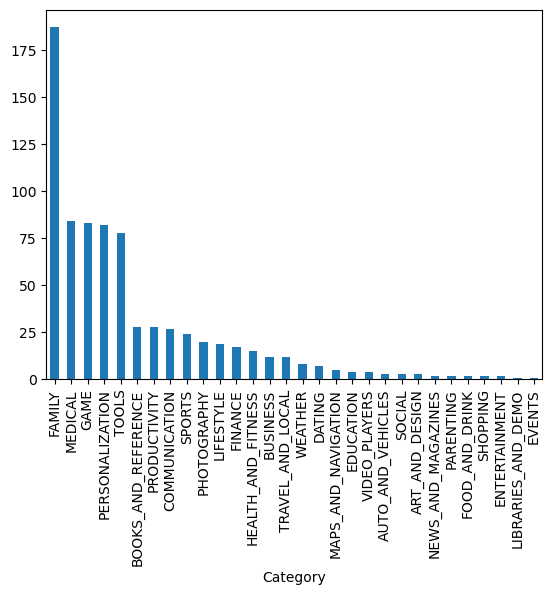

In [96]:
#How many paid apps are there in each category in descenging order
df_pr=gp[gp["Type"]=='Paid']
df_pr=df_pr.groupby('Category')['Type'].count().sort_values(ascending=False)
df_pr.plot(kind='bar')

In [97]:
df=['r1','r2','r3','r4','r5','r6','row1','row2','row3','row4']
g=df.groupby(df,index.str.len())
g.aggregate({'A':len,'B':np.sum})

AttributeError: 'list' object has no attribute 'groupby'